## Example script
Takes you through the basics of generating a lower resolution version of the paper's figures and simulations. 
#### Load dependencies

In [1]:
push!(LOAD_PATH, "../src/")
using Pairwise, Multiagent

#### Load problem constants

In [2]:
alphafile = "../data/alpha.jld"
d = get_pomdp()
g = get_grid(d.pomdp.states)
print("")  # suppress output

### Pairwise encounter
The code here generates the QMDP approximate solution to the pairwise encounter and visualizes the policy.
#### Solve for pairwise encounter policy
Generation of pairwise encounter policy takes a few minutes. Comment out `gen_pairwise_policy` line to use pre-computed policy datafile for the next part.

In [3]:
# gen_pairwise_policy(d)
alpha = read_alpha(alphafile)
print("")  # suppress output

#### Visualize policy as heatmap

Slider{Float64}([Input{Float64}] 180.0,"p",180.0,0.0:90.0:360.0)

Slider{Float64}([Input{Float64}] 15.0,"v0",15.0,10.0:5.0:20.0)

Slider{Float64}([Input{Float64}] 15.0,"v1",15.0,10.0:5.0:20.0)

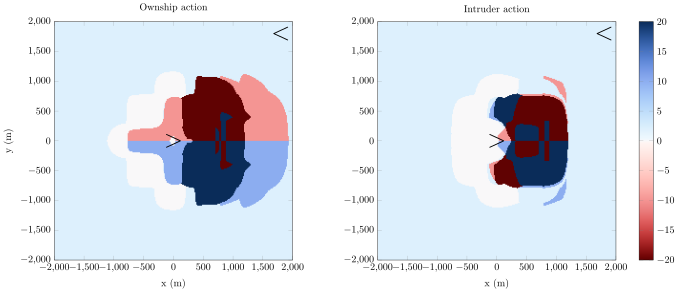

In [4]:
viz_pairwise_policy(d, alpha)

### Multithreat coordination
The code here uses the pairwise encounter solution from above to generate locally optimal policies in real-time. Basic visualization and trajectory simulation and plotting are demonstrated below.
#### Visualize example three-aircraft encounter policy heatmap
Note that `iutilFn = 1` correponds to the max-min policy, and that `iutilFn = 2` corresponds to the max-sum policy.

Slider{Int64}([Input{Int64}] 1,"iutilFn",1,1:2)

Textbox{Int64}([Input{Int64}] 0,"p",nothing,0)

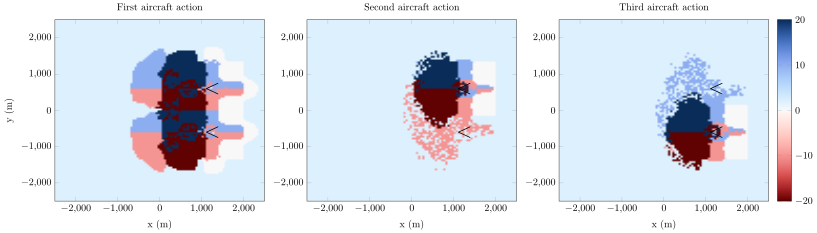

In [5]:
viz_policy(alpha, g)

#### Four-aircraft encounter simulation with trajectory visualization
Change the arguments to the desired coordination or baseline algorithm and utility function.

number of collisions = 0, average decision time = 1.391e+00 ms

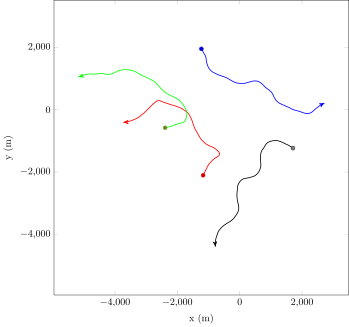

In [6]:
algorithm = utm # input utm, uncrd, coord, naive (closest-threat), or distr
utility = maxmin # input maxmin or maxsum
plot_trajs(algorithm, utility, alpha, g)

#### Bulk stress tests

In [7]:
nuavs = 2:5
nsim = 10
bulk_test(nuavs, nsim, alpha, g)

beginning stress tests...
nuavs = 2: cputime = 8.71e+00 sec
maxmin nlms bool: [0,0,0,0,0]
maxmin alerts: [1971,1982,1969,1984,1987]
maxsum nlms bool: [0,0,0,0,0]
maxsum alerts: [1967,1984,1972,1984,1980]
nuavs = 3: cputime = 1.32e+01 sec
maxmin nlms bool: [0,0,0,0,0]
maxmin alerts: [2941,2957,2927,2880,2943]
maxsum nlms bool: [0,0,0,1,0]
maxsum alerts: [2961,2941,2949,2882,2937]
nuavs = 4: cputime = 1.81e+01 sec
maxmin nlms bool: [0,0,0,1,0]
maxmin alerts: [3888,3903,3905,3851,3856]
maxsum nlms bool: [0,0,0,2,0]
maxsum alerts: [3907,3843,3890,3738,3884]
nuavs = 5: cputime = 2.37e+01 sec
maxmin nlms bool: [0,0,0,5,0]
maxmin alerts: [4811,4819,4802,4638,4828]
maxsum nlms bool: [0,0,0,0,0]
maxsum alerts: [4820,4884,4804,4696,4834]
Results saved to ../data/results-1.jld
